In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
# df_pathway = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
# 对pathway_name进行去重，打印
# df_pathway['pathway_class'].drop_duplicates()

In [3]:
# Axitinib Navitoclax Picolinici-acid Campthotecin BMS-754807 Afatinib Erlotinib Gefitinib
# EGFR
drug_name = 'Erlotinib' # 靶向药物 EGFR
# target_pathway = ['EGFR tyrosine kinase inhibitor resistance','Non-small cell lung cancer','MAPK signaling pathway','PI3K signaling','Cell cycle','Apoptosis,'Small cell lung cancer']
target_pathway = ['MAPK signaling','PI3K signaling','ERK signaling','Apoptosis','TGFB signaling']
target_pathway_detail = ['KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_PI3K_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_GF_RTK_RAS_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_PATHWAY_ADAPTOR_PROTEINS','KEGG_MEDICUS_REFERENCE_REGULATION_OF_GF_RTK_RAS_ERK_SIGNALING_UBIQUITINATION_OF_RTK_BY_CBL','KEGG_MEDICUS_REFERENCE_ERK_RSK_SIGNALING','KEGG_MEDICUS_REFERENCE_MLK_JNK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_PP2A_AKT_SIGNALING_PATHWA']

In [4]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [5]:
df_smiles = pd.read_csv('../../data/CCLE-GDSC-SMILES.csv')
df_smiles.head()

,CID,SMILES,DRUG_NAME
0,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,Camptothecin
1,13342,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,Vinblastine
2,5702198,N.N.Cl[Pt]Cl,Cisplatin
3,6253,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,Cytarabine
4,148124,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Docetaxel


In [6]:
# 筛选出药物是Oxaliplatin
df_smiles_single_drug = df_smiles[df_smiles['DRUG_NAME'] == drug_name]
df_smiles_single_drug.head()

,CID,SMILES,DRUG_NAME
42,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,Erlotinib


In [7]:
df_smiles_att = pd.read_csv('../../data/TransMCA_Smiles_Attention_MixedSet_GEP.csv')
df_smiles_att.head()

,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,AZD5582,22RV1,PRAD,0.001370,0.001521,0.001454,0.001706,0.001365,0.001494,0.001544,...,0.003941,0.003855,0.005668,0.003806,0.003874,0.005328,0.003379,0.006907,0.005089,0.003104
1,BMS-754807,22RV1,PRAD,0.001514,0.001662,0.001565,0.001833,0.001498,0.001634,0.001774,...,0.006810,0.005764,0.032638,0.025503,0.028222,0.008199,0.005181,0.005937,0.006428,0.005327
2,Cediranib,22RV1,PRAD,0.001486,0.001627,0.001532,0.001809,0.001452,0.001607,0.001705,...,0.004837,0.005213,0.006684,0.003508,0.025560,0.021572,0.018174,0.005961,0.006363,0.004061
3,Crizotinib,22RV1,PRAD,0.001484,0.001618,0.001533,0.001803,0.001450,0.001602,0.001718,...,0.004957,0.003650,0.013994,0.013716,0.016235,0.007871,0.005063,0.005906,0.006507,0.005265
4,Daporinad,22RV1,PRAD,0.001659,0.001881,0.001699,0.001988,0.001715,0.001802,0.001929,...,0.005951,0.006124,0.007619,0.005106,0.006653,0.008402,0.009624,0.014723,0.007268,0.005047


In [8]:
# 筛选出药物是Oxaliplatin
df_smiles_att_single_drug = df_smiles_att[df_smiles_att['drug'] == drug_name]
# 筛选出cell_line = ['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1']
# NSCLC:['EKVX','HCC827','LCLC103H','NCIH1299','NCIH2170','NCIH2228','PC14','RERFLCSQ1']
# LUAD:['NCIH2228','HCC827','EKVX','PC14']
# SCLC:['NCIH526','LU135','NCIH146','NCIH1963']
cell_line = ['PC14','HCC827'] # LUAD 发生EGFR突变：HCC827，PC14
# cell_line = ['EKVX','NCIH2228']
# cell_line = ['NCIH526','LU135','NCIH146','NCIH1963']
df_smiles_att_single_drug = df_smiles_att_single_drug[df_smiles_att_single_drug['cell_line'].isin(cell_line)]
print(df_smiles_att_single_drug.shape)
df_smiles_att_single_drug.head()

(2, 259)


,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
3437,Erlotinib,HCC827,LUAD,0.001510,0.001656,0.001541,0.001826,0.001471,0.001635,0.002396,...,0.006543,0.009678,0.026026,0.021330,0.022416,0.008520,0.005655,0.005633,0.006658,0.005065
9317,Erlotinib,PC14,LUAD,0.001509,0.001654,0.001545,0.001832,0.001471,0.001625,0.002529,...,0.004068,0.004697,0.006590,0.005482,0.005237,0.009441,0.004974,0.006310,0.005922,0.004257


In [9]:
# 读取drug_sensitivity数据
df_drug_sensitivity = pd.read_csv('../../data/drug_sensitivity_MixedSet_Erlotinib_test&prediction.csv')
# 筛选出cell_line = ['NCIH2228','HCC827','EKVX','PC14']，drug = Gefitinib的数据
df_drug_sensitivity_single_drug = df_drug_sensitivity[(df_drug_sensitivity['cell_line'].isin(cell_line)) & (df_drug_sensitivity['drug'] == 'Erlotinib')] #  & (df_drug_sensitivity['drug'] == drug_name)
print(df_drug_sensitivity_single_drug.shape)
df_drug_sensitivity_single_drug.head()

(2, 6)


,Unnamed: 0,drug,cell_line,OncotreeCode,IC50,prediction
3437,3437,Erlotinib,HCC827,LUAD,-2.707414,-0.576975
9317,9317,Erlotinib,PC14,LUAD,-2.165833,-1.300865


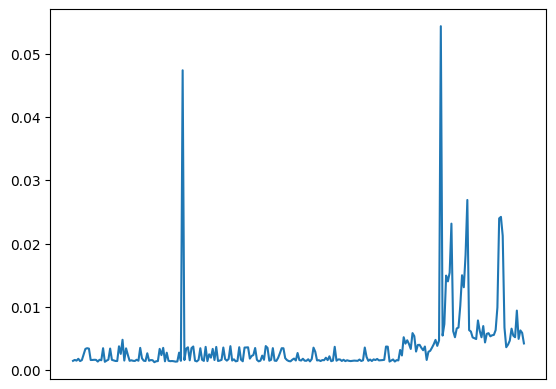

In [10]:
# 将df_smiles_att_oxaliplatin从第四列开始的数据取均值
df_smiles_att_single_drug_mean = df_smiles_att_single_drug.iloc[:, 3:].mean(axis=0)
# 将df_smiles_att_oxaliplatin_mean画成折线图
plt.plot(df_smiles_att_single_drug_mean)
# 不显示X轴的信息
plt.xticks([])
plt.show()

In [11]:
from pytoda.smiles import SMILESTokenizer
smiles_language_filepath = '../../../data/smiles_language/tokenizer_customized'
# Load SMILES language
smiles_language = SMILESTokenizer.from_pretrained(smiles_language_filepath)
smiles_language.set_encoding_transforms(
    add_start_and_stop=True,
    padding=True,
    padding_length=256,
    # padding_length=params.get("smiles_padding_length", None),
)
smiles_language.set_smiles_transforms(
    augment=False,
    canonical=False,
    kekulize=False,
    all_bonds_explicit=False,
    all_hs_explicit=False,
    remove_bonddir=False,
    remove_chirality=False,
    selfies=False,
    sanitize=False,
)
smiles_language.add_dataset(df_smiles['SMILES'])

In [12]:
single_drug = smiles_language.smiles_to_token_indexes(df_smiles[df_smiles['DRUG_NAME'] == drug_name]['SMILES'].values[0])
single_drug_num_array = np.array(single_drug)
type(single_drug_num_array)

numpy.ndarray

In [13]:
# 根据dict将Oxaliplatin从数字替换成字符
single_drug_strs = [list(dict.keys())[list(dict.values()).index(i)] for i in single_drug]
# 将Oxaliplatin转换成ndarray
single_drug_strs = np.array(single_drug_strs)
type(single_drug_strs)

numpy.ndarray

In [14]:
df_smiles_att_oxaliplatin_mean = df_smiles_att_single_drug_mean.to_numpy()
type(df_smiles_att_oxaliplatin_mean)

numpy.ndarray

In [15]:
single_drug_observe = np.vstack([single_drug_num_array, single_drug_strs, df_smiles_att_oxaliplatin_mean])
single_drug_observe

array([['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [16]:
start = 203
end = 255
# 取single_drug_observe224-255的数据
single_drug_observe_224_255 = single_drug_observe[:, start:end]
# dataframe
# single_drug_observe_224_255 = pd.DataFrame(single_drug_observe_224_255)
single_drug_observe_224_255

array([['38', '35', '38', '38', '35', '38', '6', '37', '38', '4', '38',
        '37', '38', '7', '38', '4', '37', '38', '6', '5', '38', '4',
        '37', '36', '38', '37', '36', '7', '5', '36', '38', '8', '37',
        '38', '38', '37', '38', '38', '4', '37', '38', '8', '5', '38',
        '45', '38', '5', '35', '38', '38', '35', '38'],
       ['C', 'O', 'C', 'C', 'O', 'C', '1', '=', 'C', '(', 'C', '=', 'C',
        '2', 'C', '(', '=', 'C', '1', ')', 'C', '(', '=', 'N', 'C', '=',
        'N', '2', ')', 'N', 'C', '3', '=', 'C', 'C', '=', 'C', 'C', '(',
        '=', 'C', '3', ')', 'C', '#', 'C', ')', 'O', 'C', 'C', 'O', 'C'],
       ['0.003583779', '0.004126188', '0.004817098', '0.003870389',
        '0.004736577', '0.054329842', '0.00549863', '0.00731571',
        '0.014962277', '0.014049462', '0.015433264', '0.023164764',
        '0.006192931', '0.005234589', '0.006625508', '0.006768137',
        '0.010193159', '0.015016866', '0.013125713', '0.018252796',
        '0.026901573', '0.0063

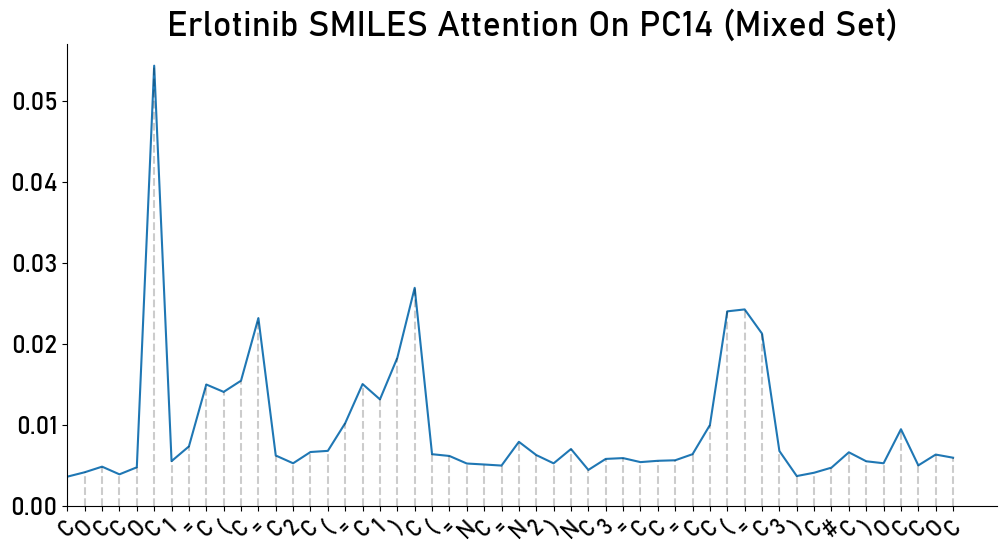

In [17]:
# 将single_drug_observe_224_255画成折线图,第三行是attention，是数值型，所以画成折线图
# 将single_drug_observe_224_255[2]变成浮点数  
single_drug_observe_y = single_drug_observe_224_255[2].astype(float)
single_drug_observe_x = single_drug_observe_224_255[1]
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 将画布设置宽一点
plt.figure(figsize=(12, 6))
plt.plot(single_drug_observe_y)
# 每个点与X轴加上虚线
for i in range(len(single_drug_observe_y)):
    plt.vlines(i, 0, single_drug_observe_y[i], linestyles='dashed', colors='black', alpha=0.2)
# 取消上边框
plt.gca().spines['top'].set_visible(False)
# 取消右边框
plt.gca().spines['right'].set_visible(False)
# title
plt.title(drug_name + ' SMILES Attention On PC14 (Mixed Set)', fontsize=25)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=18)
plt.xticks(np.arange(end - start), single_drug_observe_x)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.savefig(drug_name + '_SMILES_Attention_Observation_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
df_pathways_att = pd.read_csv('../../data/TransMCA_Pathway_Attention_MixedSet_GEP.csv')
# 筛选出drug = Oxaliplatin
df_pathways_att_single_drug = df_pathways_att[df_pathways_att['drug'] == drug_name]
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_att_single_drug = df_pathways_att_single_drug[df_pathways_att_single_drug['cell_line'].isin(cell_line)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(1, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9317,Erlotinib,PC14,LUAD,0.001139,0.001279,0.001534,0.00261,0.001863,0.001139,0.000981,...,0.001532,0.001505,0.001533,0.001066,0.001849,0.00154,0.002953,0.001139,0.002938,0.001056


In [19]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001139
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001279
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001534
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.002610
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001863
dtype: float64

In [20]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [21]:
# 筛选出pathway_class是target_pathway的数据  二选一
df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(target_pathway)]
# 筛选出df_pathways_info中pathway_name包含EGFR或者ERBB2的数据
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].str.contains('EGFR|ERBB2')]
print(df_pathways_info.shape)
df_pathways_info.head()

(59, 5)


,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
5,5,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALIN...,N01353,Env factor,ERK signaling
10,10,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_RAS_ERK_SIGN...,N01408,Env factor,ERK signaling
12,12,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_S...,N01348,Env factor,PI3K signaling
14,14,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,N01339,Env factor,PI3K signaling


In [22]:
# 筛选出pathway_class是target_pathway的数据  二选一
# df_pathways_info = df_pathways_info_origin[df_pathways_info_origin['pathway_name'].isin(target_pathway_detail)]
# print(df_pathways_info.shape)
# df_pathways_info.head()

In [23]:
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)]
# 从第二列开始取均值
df_gep_mean = df_gep.iloc[:, 1:].mean(axis=0)
df_gep_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            4.352209
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            1.894415
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      2.017583
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.047460
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    1.276917
dtype: float64

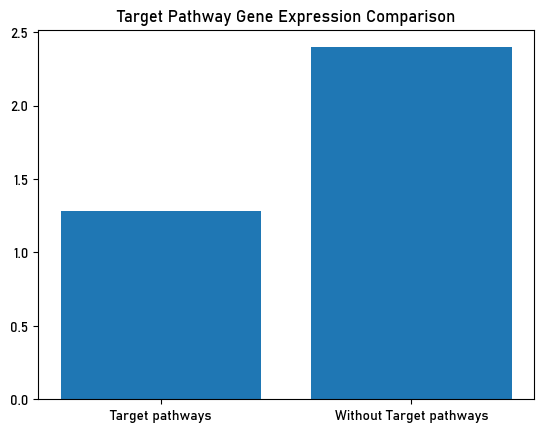

In [24]:
# 从df_gep_mean取出DNA_replication的数据
df_gep_mean_DNA_replication = df_gep_mean[df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
df_gep_mean_without_DNA_replication = df_gep_mean[~df_gep_mean.index.isin(df_pathways_info['pathway_name'])]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_gep_mean_DNA_replication.mean(), df_gep_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Gene Expression Comparison')
plt.show()

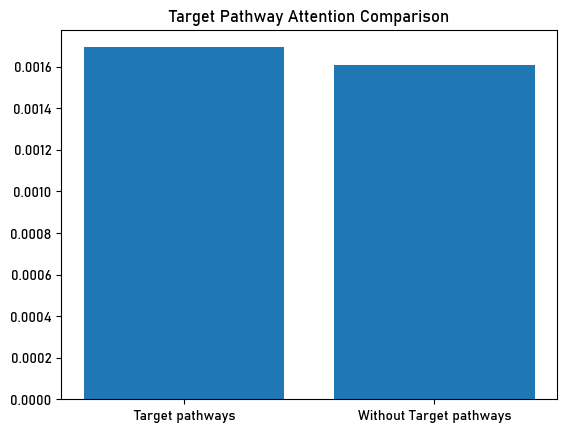

In [25]:
DNA_replication_pathways = df_pathways_info['pathway_name']
# 从df_pathways_att_oxaliplatin_mean取出DNA_replication_pathways的数据
df_pathways_att_oxaliplatin_mean_DNA_replication = df_pathways_single_drug_mean[df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
df_pathways_att_mean_without_DNA_replication = df_pathways_single_drug_mean[~df_pathways_single_drug_mean.index.isin(DNA_replication_pathways)]
# 算出两个数据的均值，画柱状图
plt.bar(['Target pathways', 'Without Target pathways'], [df_pathways_att_oxaliplatin_mean_DNA_replication.mean(), df_pathways_att_mean_without_DNA_replication.mean()])
#title
plt.title('Target Pathway Attention Comparison')
plt.show()

In [26]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [27]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
288,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
457,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION
426,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGN...
108,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING...
178,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIO...


In [28]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(59, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003019,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,153,N01461,Reference,TGFB signaling
1,0.002972,KEGG_MEDICUS_REFERENCE_NODAL_SIGNALING_PATHWAY,350,N01459,Reference,TGFB signaling
2,0.002942,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,358,N01163,Reference,PI3K signaling
3,0.002594,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PAT...,266,N01657,Reference,PI3K signaling
4,0.002499,KEGG_MEDICUS_REFERENCE_BMP15_SIGNALING_PATHWAY,150,N01455,Reference,TGFB signaling


In [29]:
# 将df_pathways_single_drug_mean中pathway_name列存在在DNA_replication_pathways中，颜色标注为红色，其余为蓝色
df_pathways_single_drug_mean['color'] = np.where(df_pathways_single_drug_mean['pathway_name'].isin(DNA_replication_pathways), 'r', 'b')
# 重置索引
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
df_pathways_single_drug_mean.head(50)

,attention,pathway_name,color
0,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b
1,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b
2,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGN...,b
3,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING...,b
4,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIO...,b
5,0.003046,KEGG_MEDICUS_REFERENCE_DNA_DEGRADATION_BY_EXTR...,b
6,0.003046,KEGG_MEDICUS_REFERENCE_IL6_FAMILY_TO_JAK_STAT_...,b
7,0.003045,KEGG_MEDICUS_REFERENCE_HYDROLYSIS_OF_SPHINGOMY...,b
8,0.003027,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PROK...,b
9,0.003019,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,r


中值: 0.0015322


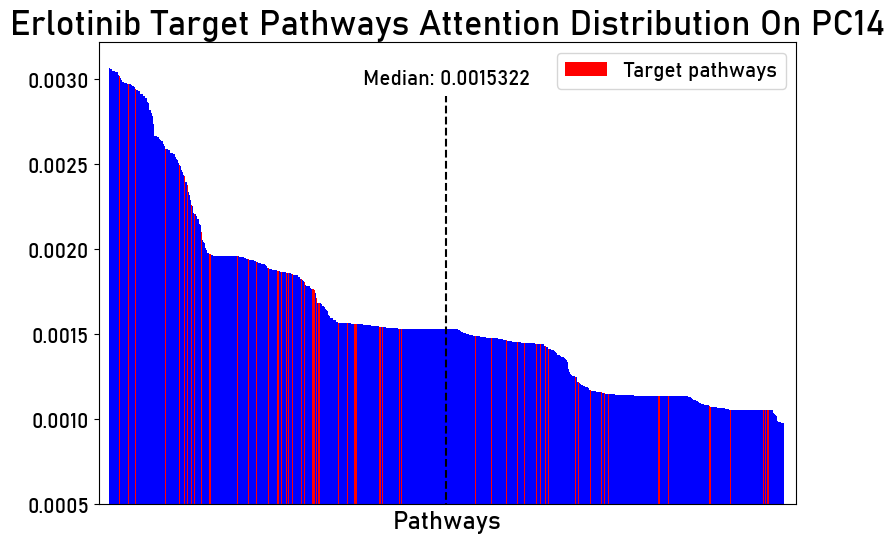

In [30]:
# 设置画布大小
plt.figure(figsize=(9, 6))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean['pathway_name'], df_pathways_single_drug_mean['attention'], color=df_pathways_single_drug_mean['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
plt.vlines(309, 0, 0.0029, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
plt.text(309, 0.00295, 'Median: 0.0015322', ha='center', va='bottom', fontsize=15)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Target pathways')
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend(fontsize=15)
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title(drug_name + ' Target Pathways Attention Distribution On PC14', fontsize=25)
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylim(bottom=0.0005)
plt.xlim(left=-10, right=630)
plt.xlabel('Pathways', fontsize=18)
# 保存图片
plt.savefig(drug_name + '_NSCLC_Target_Pathway_Attention_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# 帮我找出所有color为r的index
target_pathways = df_pathways_single_drug_mean[df_pathways_single_drug_mean['color'] == 'r']
# 将每个index除以618，得到比例
p = (target_pathways.index+1) / 619
print('所占百分比:',p)

所占百分比: Index([ 0.01615508885298869, 0.029079159935379646,  0.04038772213247173,
         0.0840064620355412,   0.1050080775444265,  0.11308562197092084,
        0.11631663974151858,  0.12277867528271405,  0.12762520193861066,
        0.13731825525040386,  0.15024232633279483,  0.19063004846526657,
        0.20678513731825526,   0.2197092084006462,  0.23747980613893377,
        0.25040387722132473,   0.2520193861066236,   0.2568659127625202,
         0.2633279483037157,   0.2665589660743134,   0.2730210016155089,
         0.2859450726978998,  0.29079159935379645,  0.30210016155088854,
         0.3037156704361874,   0.3053311793214863,    0.308562197092084,
        0.31179321486268174,   0.3408723747980614,  0.35379644588045234,
         0.3651050080775444,   0.3667205169628433,  0.40226171243941844,
        0.40549273021001614,  0.43134087237479807,   0.4345718901453958,
         0.5444264943457189,    0.567043618739903,   0.5896607431340872,
         0.6058158319870759,    0.6171243941

In [32]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head(100)

(59, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003019,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,r,153,N01461,Reference,TGFB signaling
1,0.002972,KEGG_MEDICUS_REFERENCE_NODAL_SIGNALING_PATHWAY,r,350,N01459,Reference,TGFB signaling
2,0.002942,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,r,358,N01163,Reference,PI3K signaling
3,0.002594,KEGG_MEDICUS_REFERENCE_GPCR_PI3K_SIGNALING_PAT...,r,266,N01657,Reference,PI3K signaling
4,0.002499,KEGG_MEDICUS_REFERENCE_BMP15_SIGNALING_PATHWAY,r,150,N01455,Reference,TGFB signaling
5,0.002432,KEGG_MEDICUS_REFERENCE_PDL_PD1_SHP_PI3K_SIGNAL...,r,377,N01165,Reference,PI3K signaling
6,0.002380,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATHWAY,r,152,N01458,Reference,TGFB signaling
7,0.002263,KEGG_MEDICUS_REFERENCE_MYOSTATIN_SIGNALING_PAT...,r,347,N01457,Reference,TGFB signaling
8,0.002208,KEGG_MEDICUS_REFERENCE_AMH_SIGNALING_PATHWAY,r,116,N01454,Reference,TGFB signaling
9,0.002104,KEGG_MEDICUS_REFERENCE_PLASMIN_MEDIATED_ACTIVA...,r,381,N01460,Reference,TGFB signaling


In [33]:
# 将df_pathways_single_drug_mean与df_pathways_info_origin合并
df_pathways_single_drug_mean_merge_origin = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge_origin.shape)
df_pathways_single_drug_mean_merge_origin.head(200)

(619, 7)


,attention,pathway_name,color,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.003065,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,b,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
1,0.003064,KEGG_MEDICUS_REFERENCE_TYROSINE_DEGRADATION,b,457,N00708,Reference,Phenylalanine and tyrosine metabolism
2,0.003059,KEGG_MEDICUS_REFERENCE_TGFA_EGFR_PLCG_PKC_SIGN...,b,426,N00227,Reference,Hepatocellular carcinoma
3,0.003050,KEGG_MEDICUS_REFERENCE_ACTH_CORTISOL_SIGNALING...,b,108,N00297,Reference,CRH-ACTH-cortisol signaling
4,0.003048,KEGG_MEDICUS_REFERENCE_CHONDROITIN_SULFATE_BIO...,b,178,N01580,Reference,Glycosaminoglycan biosynthesis
...,...,...,...,...,...,...,...
195,0.001669,KEGG_MEDICUS_REFERENCE_RECRUITMENT_AND_FORMATI...,b,393,N01529,Reference,Regulation of kinetochore-microtubule interact...
196,0.001665,KEGG_MEDICUS_VARIANT_AMPLIFIED_MYC_TO_P15_CELL...,b,482,N00088,Variant,Small cell lung cancer
197,0.001661,KEGG_MEDICUS_REFERENCE_GATOR1_MTORC1_SIGNALING...,b,250,N01578,Reference,mTOR signaling
198,0.001652,KEGG_MEDICUS_REFERENCE_BCR_PLCG_CALCINEURIN_SI...,b,142,N00487,Reference,Calcium signaling


# 探究突变与基因表达的关系

In [34]:
cell_line = ['HCC827','PC14','EKVX','NCIH2228']
df_gep = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_gep = df_gep[df_gep['cell_line'].isin(cell_line)].T
# 将第一行设置为columns
df_gep.columns = df_gep.iloc[0]
# 删除第一行
df_gep = df_gep.drop(df_gep.index[0])
# 重置索引
df_gep = df_gep.reset_index()
# 将index设置为pathway_name
df_gep = df_gep.rename(columns={'index': 'pathway_name'})
print(df_gep.shape)
df_gep.head()

(619, 5)


cell_line,pathway_name,HCC827,PC14,NCIH2228,EKVX
0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,4.311409,4.352209,4.232157,4.29333
1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,0.030073,1.894415,1.408703,1.373549
2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,2.248177,2.017583,1.925932,1.99405
3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.193846,0.04746,0.064468,0.950655
4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,1.177187,1.276917,0.46233,1.010135


In [35]:
# 筛选出main_pathway = [KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_RASSF1_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_PLCG_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_RAS_ERK_SIGNALING_PATHWAY]的数据
main_pathway = ['KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_RASSF1_SIGNALING_PATHWAY','KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_PI3K_SIGNALING_PATHWAY','KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_PLCG_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_RAS_ERK_SIGNALING_PATHWAY']
df_gep_main_pathway = df_gep[df_gep['pathway_name'].isin(main_pathway)]
print(df_gep_main_pathway.shape)
df_gep_main_pathway.head()

(5, 5)


cell_line,pathway_name,HCC827,PC14,NCIH2228,EKVX
223,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNA...,1.705997,1.866652,1.977506,2.693816
228,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_RASSF1_SIG...,1.353761,1.339844,1.471256,1.605656
520,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,1.512667,2.008608,1.366556,1.226372
521,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,2.048948,1.953427,1.925709,2.994919
522,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,3.954895,3.578345,3.633508,4.076496


In [36]:
# ['MAPK signaling','PI3K signaling','ERK signaling','Apoptosis','TGFB signaling']
# 'PI3K signaling','Non-small cell lung cancer'
main_pathway_class = ['PI3K signaling']
main_pathway = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(main_pathway_class)]['pathway_name'].values
# 筛选出df_gep的pathway_name是main_pathway的数据
df_gep_main_pathway = df_gep[df_gep['pathway_name'].isin(main_pathway)]
print(df_gep_main_pathway.shape)
df_gep_main_pathway.head(50)

(21, 5)


cell_line,pathway_name,HCC827,PC14,NCIH2228,EKVX
12,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_S...,1.957261,1.965378,1.330225,1.268249
14,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,1.469196,1.412639,1.495145,1.286461
15,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,0.759624,1.38975,0.839765,0.295897
67,KEGG_MEDICUS_PATHOGEN_HPV_E7_TO_PP2A_AKT_SIGNA...,2.12838,2.303305,2.687063,2.244631
106,KEGG_MEDICUS_REFERENCE_ACH_CHRN_PI3K_SIGNALING...,0.413001,0.574227,0.513788,0.338402
141,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,0.570259,0.942931,0.688499,0.010266
172,KEGG_MEDICUS_REFERENCE_CD80_CD86_CD28_PI3K_SIG...,0.050597,0.203826,0.065521,0.00707
173,KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SI...,1.208937,1.652255,1.801619,1.348739
219,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...,2.259242,2.252249,2.806536,1.85749
235,KEGG_MEDICUS_REFERENCE_EP_NE_ADRB_PI3K_SIGNALI...,1.692882,1.588153,1.017652,0.933169


stat: 86.0
p: 0.32045745849609375


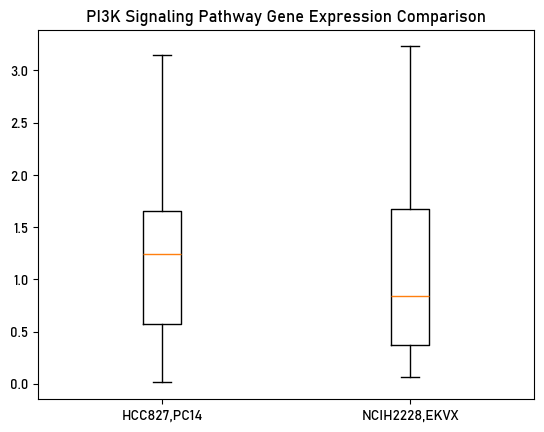

In [37]:
# 计算HCC827列和PC14列的均值
df_gep_main_pathway_mean = df_gep_main_pathway[['PC14']].mean(axis=1).values.astype(float)
# 计算NCIH2228列和EKVX列的均值
df_gep_main_pathway_mean_2 = df_gep_main_pathway[['NCIH2228']].mean(axis=1).values.astype(float)
# 计算两者的p值,使用wilcoxon检验
from scipy.stats import wilcoxon
stat, p = wilcoxon(df_gep_main_pathway_mean, df_gep_main_pathway_mean_2, alternative='two-sided')
print('stat:',stat)
print('p:',p)
# 画出箱线图，并计算两者的p值，使用t检验，显示在图上
plt.boxplot([df_gep_main_pathway_mean, df_gep_main_pathway_mean_2])
# plt.text(1.5, 0.5, 'p = ' + str(p), fontsize=15)
plt.xticks([1, 2], ['HCC827,PC14', 'NCIH2228,EKVX'])
plt.title('PI3K Signaling Pathway Gene Expression Comparison')
plt.show()

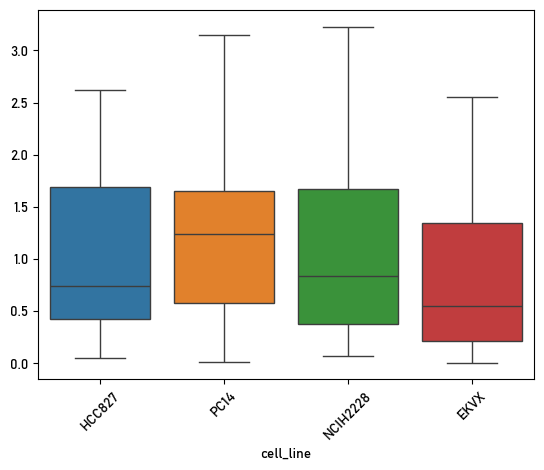

In [38]:
# df_gep_main_pathway 画出箱线图 ,不展示异常值,根据columns显示X轴，使用seaborn画图
import seaborn as sns
sns.boxplot(data=df_gep_main_pathway.iloc[:, 1:], showfliers=False)
plt.xticks(rotation=45)
plt.show()

In [39]:
# 筛选出df_gep的pathway_name是包含ALK的数据
df_gep_ALK = df_gep[df_gep['pathway_name'].str.contains('EGFR')]
print(df_gep_ALK.shape)
df_gep_ALK.head(50)

(26, 5)


cell_line,pathway_name,HCC827,PC14,NCIH2228,EKVX
61,KEGG_MEDICUS_PATHOGEN_HPV_E5_TO_EGFR_RAS_ERK_S...,3.951241,3.612143,3.755802,3.998826
122,KEGG_MEDICUS_REFERENCE_AREG_EGFR_PI3K_SIGNALIN...,2.48395,2.23353,1.841941,1.972415
123,KEGG_MEDICUS_REFERENCE_AREG_EGFR_RAS_ERK_SIGNA...,3.987281,3.214955,3.710813,3.943879
218,KEGG_MEDICUS_REFERENCE_EGF_EGFR_ACTIN_SIGNALIN...,6.429607,6.549385,6.895762,6.651855
219,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...,2.259242,2.252249,2.806536,1.85749
220,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_SIGNALING...,1.131505,1.850875,1.417176,1.015895
221,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_CALCINEUR...,1.109867,1.180032,1.248624,1.335898
222,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_CAMK_SIGN...,0.338148,0.498128,0.787785,0.872353
223,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNA...,1.705997,1.866652,1.977506,2.693816
224,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_ERK_SIGNAL...,3.422954,3.409846,3.644061,3.704116


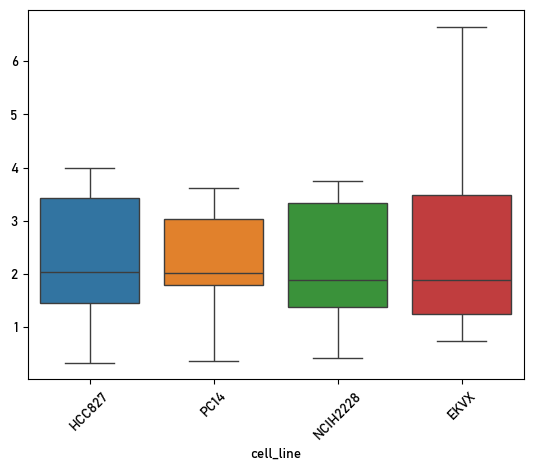

In [40]:
# df_gep_ALK 画出箱线图 ,不展示异常值,根据columns显示X轴，使用seaborn画图
sns.boxplot(data=df_gep_ALK.iloc[:, 1:], showfliers=False)
plt.xticks(rotation=45)
plt.show()


# 探究通路权重

In [41]:
df_pathways_attention_observe = pd.read_csv('../../data/TransMCA_Pathway_Attention_MixedSet_GEP.csv')
# 去掉OncotreeCode列
df_pathways_attention_observe = df_pathways_attention_observe.drop(columns=['OncotreeCode'])
# 筛选出drug = Erlotinib
df_pathways_attention_observe = df_pathways_attention_observe[df_pathways_attention_observe['drug'] == drug_name]

# 筛选出cell_line = ['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228']
df_pathways_attention_observe = df_pathways_attention_observe[df_pathways_attention_observe['cell_line'].isin(cell_line)].T
# 去掉第一行
df_pathways_attention_observe = df_pathways_attention_observe.drop(df_pathways_attention_observe.index[0])
# 将第一行设置为columns
df_pathways_attention_observe.columns = df_pathways_attention_observe.iloc[0]
# 重置索引
df_pathways_attention_observe = df_pathways_attention_observe.reset_index()
# 将index设置为pathway_name
df_pathways_attention_observe = df_pathways_attention_observe.rename(columns={'index': 'pathway_name'})
# 删除第一行
df_pathways_attention_observe = df_pathways_attention_observe.drop(df_pathways_attention_observe.index[0])
df_pathways_attention_observe.head()

cell_line,pathway_name,EKVX,HCC827,NCIH2228,PC14
1,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,0.001132,0.001137,0.001066,0.001139
2,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,0.001396,0.00226,0.001458,0.001279
3,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,0.001527,0.001531,0.001532,0.001534
4,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.001598,0.002514,0.002582,0.00261
5,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,0.001867,0.001867,0.001897,0.001863


In [42]:
main_pathway = ['KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_RASSF1_SIGNALING_PATHWAY','KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_PI3K_SIGNALING_PATHWAY','KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_PLCG_ERK_SIGNALING_PATHWAY','KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_TO_RAS_ERK_SIGNALING_PATHWAY']
df_pathways_attention_observe_main_pathway = df_pathways_attention_observe[df_pathways_attention_observe['pathway_name'].isin(main_pathway)]
print(df_pathways_attention_observe_main_pathway.shape)
df_pathways_attention_observe_main_pathway.head()

(5, 5)


cell_line,pathway_name,EKVX,HCC827,NCIH2228,PC14
224,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PLCG_ERK_SIGNA...,0.001525,0.001532,0.001529,0.001533
229,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_RASSF1_SIG...,0.001558,0.001565,0.001561,0.001567
521,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,0.001193,0.001172,0.001172,0.001147
522,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,0.001047,0.001054,0.001054,0.001057
523,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_EGFR_T...,0.001047,0.001051,0.00105,0.001054


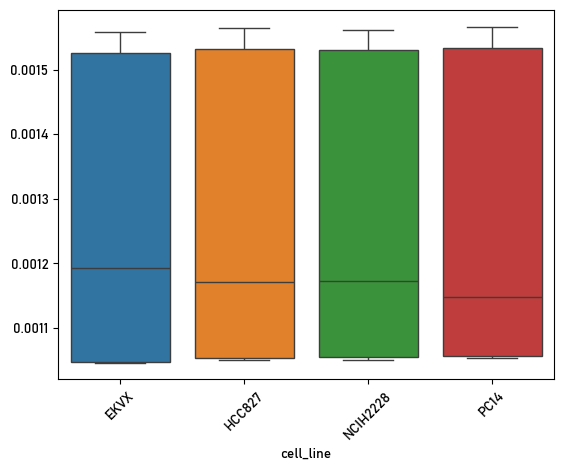

In [43]:
# df_pathways_attention_observe_main_pathway 画出箱线图 ,不展示异常值，根据columns显示X轴，使用seaborn画图
sns.boxplot(data=df_pathways_attention_observe_main_pathway.iloc[:, 1:], showfliers=False)
plt.xticks(rotation=45)
plt.show()

In [44]:
# 'MAPK signaling','PI3K signaling','ERK signaling','Apoptosis','TGFB signaling'
main_pathway_class = ['PI3K signaling']
main_pathway = df_pathways_info_origin[df_pathways_info_origin['pathway_class'].isin(main_pathway_class)]['pathway_name'].values
# 筛选出df_pathways_attention_observe的pathway_name是main_pathway的数据
df_pathways_attention_observe_main_pathway = df_pathways_attention_observe[df_pathways_attention_observe['pathway_name'].isin(main_pathway)]
print(df_pathways_attention_observe_main_pathway.shape)
df_pathways_attention_observe_main_pathway.head(50)

(21, 5)


cell_line,pathway_name,EKVX,HCC827,NCIH2228,PC14
13,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_PI3K_S...,0.001118,0.001075,0.001122,0.001076
15,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,0.001443,0.001468,0.001455,0.001433
16,KEGG_MEDICUS_ENV_FACTOR_NNK_NNN_TO_PI3K_SIGNAL...,0.001107,0.001054,0.001052,0.001053
68,KEGG_MEDICUS_PATHOGEN_HPV_E7_TO_PP2A_AKT_SIGNA...,0.001047,0.001051,0.001049,0.001053
107,KEGG_MEDICUS_REFERENCE_ACH_CHRN_PI3K_SIGNALING...,0.001885,0.001909,0.001912,0.001888
142,KEGG_MEDICUS_REFERENCE_BCR_BCAP_CD19_PI3K_SIGN...,0.001729,0.001572,0.001565,0.001566
173,KEGG_MEDICUS_REFERENCE_CD80_CD86_CD28_PI3K_SIG...,0.001911,0.001893,0.001915,0.001824
174,KEGG_MEDICUS_REFERENCE_CD80_CD86_CTLA4_PP2A_SI...,0.00144,0.001445,0.001443,0.001447
220,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...,0.001159,0.001146,0.001138,0.001149
236,KEGG_MEDICUS_REFERENCE_EP_NE_ADRB_PI3K_SIGNALI...,0.001135,0.001137,0.001138,0.00114


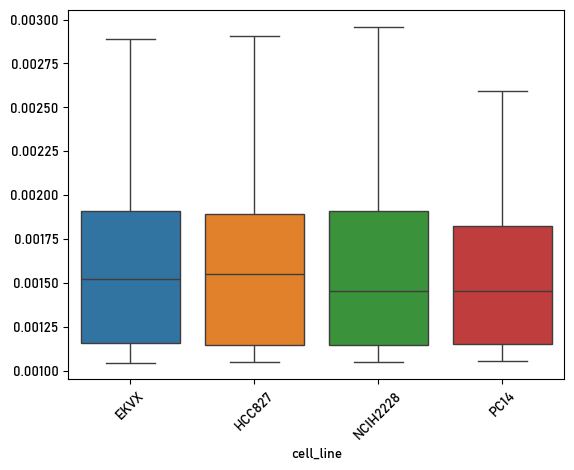

In [45]:
# df_pathways_attention_observe_main_pathway 画出箱线图 ,不展示异常值，根据columns显示X轴，使用seaborn画图
sns.boxplot(data=df_pathways_attention_observe_main_pathway.iloc[:, 1:], showfliers=False)
plt.xticks(rotation=45)
plt.show()